### Download Train Set

In [1]:
SAVE_ON_DRIVE = True

In [2]:
from google.colab import drive
import os
import shutil

drive.mount('/content/drive')

# Set paths for Validation and Test datasets
val_dataset_path = '/content/drive/MyDrive/LoveDA/Val'
test_dataset_path = '/content/drive/MyDrive/LoveDA/Test'


# Function to handle dataset download and extraction
def handle_dataset(dataset_name, zip_url, local_path, drive_path, save_on_drive):
    if not os.path.exists(local_path):
        if os.path.exists(f"{drive_path}.zip"):
            print(f"{dataset_name} dataset available on own drive, unzipping...")
            !unzip -q {drive_path}.zip -d ./
        else:
            print(f"Downloading {dataset_name} dataset...")
            !wget -O {dataset_name}.zip "{zip_url}"
            if save_on_drive:
                print(f"Saving {dataset_name} dataset on drive...")
                !cp {dataset_name}.zip {drive_path}.zip
                print(f"{dataset_name} dataset saved on drive")
            print(f"Unzipping {dataset_name} dataset...")
            !unzip -q {dataset_name}.zip -d ./
    else:
        print(f"{dataset_name} dataset already in local")

# # Handle Validation dataset
# handle_dataset("Validation", "https://zenodo.org/records/5706578/files/Val.zip?download=1", "./Val", "/content/drive/MyDrive/LoveDA/Val", SAVE_VAL_TOO)

# # Handle Test dataset
# handle_dataset("Test", "https://zenodo.org/records/5706578/files/Test.zip?download=1", "./Test", "/content/drive/MyDrive/LoveDA/Test", False)

# Handle Train dataset
handle_dataset("Train", "https://zenodo.org/records/5706578/files/Train.zip?download=1", "./Train", "/content/drive/MyDrive/LoveDA/Train", SAVE_ON_DRIVE)

Mounted at /content/drive
Train dataset available on own drive, unzipping...


### Dirs

In [3]:
from PIL import Image
import os
import torch
from tqdm import tqdm

def pil_loader(path, color_type):
    # open path as file to avoid ResourceWarning (https://github.com/python-pillow/Pillow/issues/835)
    with open(path, 'rb') as f:
        img = Image.open(f)
        return img.convert(color_type)

urban_masks_path = "./Train/Urban/masks_png"
rural_masks_path = "./Train/Rural/masks_png"


### Calculation

In [4]:
import torch
import numpy as np

idx_to_class = {
    0: 'Background',
    1: 'Building',
    2: 'Road',
    3: 'Water',
    4: 'Barren',
    5: 'Forest',
    6: 'Agricultural',
    7: 'Unclassified'
}

class_ids = [0, 1, 2, 3, 4, 5, 6, 7]

img_unlabel_count = dict()

total = 0
for masks_path in [rural_masks_path]:
    print(f"processing {masks_path}")

    loop = tqdm(os.listdir(masks_path))
    for filename in loop:
        loop.set_description(f"Processing {filename} from ") # update desc with filename

        mask = pil_loader(os.path.join(masks_path, filename), "L")

        # Convert the PIL Image to a PyTorch tensor
        mask_tensor = torch.from_numpy(np.array(mask))

        # Count the occurrences of each class using torch.unique
        unique_classes, counts = torch.unique(mask_tensor, return_counts=True)

        # if 7 in unique_classes:
        #   print()
        #   print(unique_classes)
        #   print(counts)

        if 0 in unique_classes:
          try:
            img_unlabel_count[filename] = counts[0]
          except:
            img_unlabel_count[filename] = 0



processing ./Train/Rural/masks_png


Processing 222.png from : 100%|██████████| 1366/1366 [00:46<00:00, 29.10it/s]


In [13]:

import operator

sorted_img_unlabel_count = dict(sorted(img_unlabel_count.items(), key=operator.itemgetter(1)))
print(sorted_img_unlabel_count)

# Calculate n percentile
import numpy as np
import operator

# Extract the counts (values) from the sorted dictionary
counts = list(sorted_img_unlabel_count.values())

k = 20
# Calculate the k-th percentile (median)
median = np.percentile(counts, k)
filtered_img_unlabel_count = {k: v for k, v in img_unlabel_count.items() if v < median}
filtered_img_unlabel_count = dict(sorted(filtered_img_unlabel_count.items(), key=operator.itemgetter(1)))



{'174.png': tensor(1), '947.png': tensor(64), '679.png': tensor(65), '203.png': tensor(66), '260.png': tensor(66), '1268.png': tensor(68), '897.png': tensor(69), '175.png': tensor(71), '118.png': tensor(72), '376.png': tensor(73), '793.png': tensor(76), '625.png': tensor(86), '1160.png': tensor(99), '233.png': tensor(110), '738.png': tensor(152), '1020.png': tensor(178), '257.png': tensor(189), '195.png': tensor(223), '715.png': tensor(263), '906.png': tensor(290), '1029.png': tensor(301), '946.png': tensor(364), '1095.png': tensor(426), '758.png': tensor(462), '438.png': tensor(515), '338.png': tensor(653), '495.png': tensor(704), '172.png': tensor(787), '361.png': tensor(1344), '844.png': tensor(8397), '523.png': tensor(12341), '1072.png': tensor(26359), '840.png': tensor(26534), '413.png': tensor(27545), '1136.png': tensor(27634), '1174.png': tensor(31168), '668.png': tensor(31657), '1339.png': tensor(32928), '952.png': tensor(33727), '91.png': tensor(36198), '398.png': tensor(40973

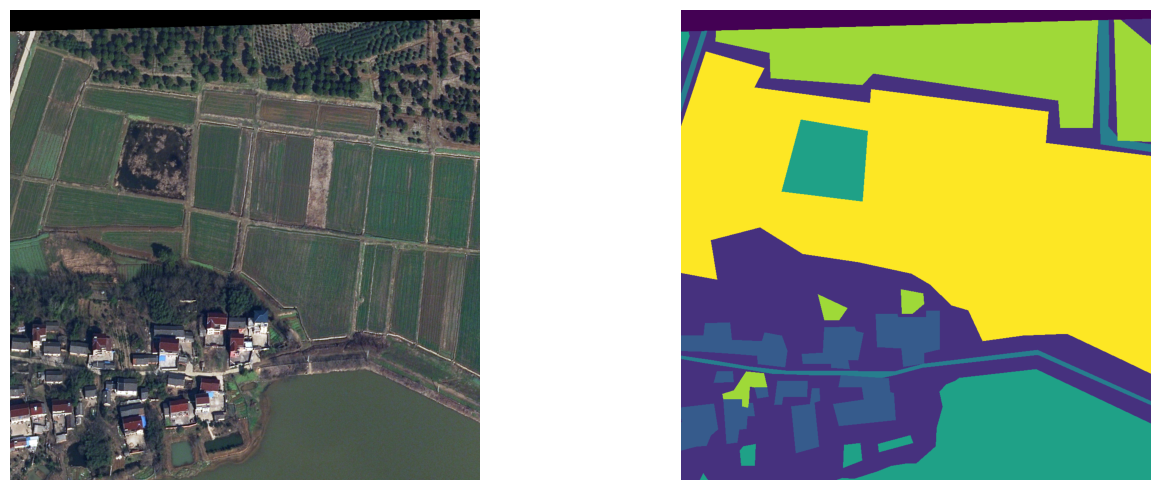

In [14]:
import matplotlib.pyplot as plt



maskpath = './Train/Rural/masks_png/952.png'
imgpath = './Train/Rural/images_png/952.png'

img = Image.open(imgpath)
mask = Image.open(maskpath)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].imshow(img)
axes[0].axis('off')

axes[1].imshow(mask)
axes[1].axis('off')

plt.tight_layout()
plt.show()